In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors
from dateutil import parser

In [28]:
# Load the dataset
coffee_data = pd.read_csv('Question 1.csv')

In [29]:
coffee_data.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [30]:
coffee_data.shape

(207, 41)

In [31]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

In [32]:
# Handle duplicates
duplicate_rows_data = coffee_data[coffee_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 41)


In [33]:
# Loop through each column and count the number of distinct values
for column in coffee_data.columns:
    num_distinct_values = len(coffee_data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0: 207 distinct values
ID: 207 distinct values
Country of Origin: 22 distinct values
Farm Name: 173 distinct values
Lot Number: 188 distinct values
Mill: 163 distinct values
ICO Number: 68 distinct values
Company: 72 distinct values
Altitude: 98 distinct values
Region: 121 distinct values
Producer: 173 distinct values
Number of Bags: 55 distinct values
Bag Weight: 39 distinct values
In-Country Partner: 21 distinct values
Harvest Year: 7 distinct values
Grading Date: 75 distinct values
Owner: 80 distinct values
Variety: 49 distinct values
Status: 1 distinct values
Processing Method: 11 distinct values
Aroma: 19 distinct values
Flavor: 19 distinct values
Aftertaste: 20 distinct values
Acidity: 19 distinct values
Body: 17 distinct values
Balance: 18 distinct values
Uniformity: 3 distinct values
Clean Cup: 1 distinct values
Sweetness: 1 distinct values
Overall: 21 distinct values
Defects: 1 distinct values
Total Cup Points: 81 distinct values
Moisture Percentage: 46 distinct value

In [34]:
# If you also want the percentage of missing values
missing_percentage = coffee_data.isnull().mean() * 100

# Display missing values with percentage
print(missing_percentage)

Unnamed: 0                0.000000
ID                        0.000000
Country of Origin         0.000000
Farm Name                 0.966184
Lot Number                0.483092
Mill                      1.449275
ICO Number               63.768116
Company                   0.000000
Altitude                  0.483092
Region                    0.966184
Producer                  0.483092
Number of Bags            0.000000
Bag Weight                0.000000
In-Country Partner        0.000000
Harvest Year              0.000000
Grading Date              0.000000
Owner                     0.000000
Variety                   2.898551
Status                    0.000000
Processing Method         2.415459
Aroma                     0.000000
Flavor                    0.000000
Aftertaste                0.000000
Acidity                   0.000000
Body                      0.000000
Balance                   0.000000
Uniformity                0.000000
Clean Cup                 0.000000
Sweetness           

In [35]:
# coffee_data_cleaned = coffee_data.drop(columns=['ICO Number'])
# coffee_data_cleaned['Farm Name'].fillna('Unknown', inplace=True)
# coffee_data_cleaned['Lot Number'].fillna('Unknown', inplace=True)
# coffee_data_cleaned['Mill'].fillna('Unknown', inplace=True)
# coffee_data_cleaned['Region'].fillna('Unknown', inplace=True)
# coffee_data_cleaned['Producer'].fillna('Unknown', inplace=True)
# coffee_data_cleaned['Altitude'].fillna(coffee_data_cleaned['Altitude'].median(), inplace=True)
# coffee_data_cleaned['Variety'].fillna(coffee_data_cleaned['Variety'].mode()[0], inplace=True)
# coffee_data_cleaned['Processing Method'].fillna(coffee_data_cleaned['Processing Method'].mode()[0], inplace=True)


In [36]:
# If you also want the percentage of missing values
missing_percentage = coffee_data_cleaned.isnull().mean() * 100

# Display missing values with percentage
print(missing_percentage)

Unnamed: 0               0.000000
ID                       0.000000
Country of Origin        0.000000
Farm Name                0.000000
Lot Number               0.000000
Mill                     0.000000
Company                  0.000000
Altitude                 0.483092
Region                   0.000000
Producer                 0.000000
Number of Bags           0.000000
Bag Weight               0.000000
In-Country Partner       0.000000
Harvest Year             0.000000
Grading Date             0.000000
Owner                    0.000000
Variety                  2.898551
Status                   0.000000
Processing Method        2.415459
Aroma                    0.000000
Flavor                   0.000000
Aftertaste               0.000000
Acidity                  0.000000
Body                     0.000000
Balance                  0.000000
Uniformity               0.000000
Clean Cup                0.000000
Sweetness                0.000000
Overall                  0.000000
Defects       

In [37]:
# Mapping the Education
processing_mapping = {
    "Double Anaerobic Washed": "Washed / Wet",
    "Semi Washed": "Washed / Wet",
    "Honey,Mossto": "Pulped natural / honey",
    "Double Carbonic Maceration / Natural": "Natural / Dry",
    "Wet Hulling": "Washed / Wet",
    "Anaerobico 1000h": "Washed / Wet",
    "SEMI-LAVADO": "Natural / Dry"
}
# Fixing the values in the column
coffee_data_cleaned['Processing Method'] = coffee_data['Processing Method'].map(processing_mapping)
coffee_data_cleaned['Processing Method'].fillna("Washed / Wet", inplace=True)

C:\Users\Meddieek\AppData\Local\Temp\ipykernel_5108\1605506329.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coffee_data_cleaned['Processing Method'].fillna("Washed / Wet", inplace=True)


In [38]:
# Manually impute specific values based on ID (Which we cant use function)
coffee_data_cleaned.loc[coffee_data_cleaned['ID'] == 99, 'Altitude'] = 5273  # Impute value for ID 99
coffee_data_cleaned.loc[coffee_data_cleaned['ID'] == 105, 'Altitude'] = 1800  # Impute value for ID 105
coffee_data_cleaned.loc[coffee_data_cleaned['ID'] == 180, 'Altitude'] = 1400  # Impute value for ID 180


# Define a function to clean and calculate the mean
def clean_altitude_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.replace(" ", "")  # Remove blank spaces
        if '-' in range_value:
            try:
                start, end = range_value.split('-')
                start = int(start)
                end = int(end)
                return (start + end) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return int(range_value)
            except ValueError:
                return np.nan
    else:
        return range_value

# Apply the function to clean and calculate the mean for each value in the "Altitude" column
coffee_data_cleaned['Altitude'] = coffee_data_cleaned['Altitude'].apply(clean_altitude_range)

In [39]:
# Extract the prior year from the "Harvest Year" column
coffee_data_cleaned['Harvest Year'] = coffee_data_cleaned['Harvest Year'].str.split('/').str[0].str.strip()

 No Missing Data (0% Missing)
Columns: Unnamed: 0, ID, Country of Origin, Company, Number of Bags, Bag Weight, In-Country Partner, Harvest Year, Grading Date, Owner, Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean Cup, Sweetness, Overall, Defects, Total Cup Points, Moisture Percentage, Category One Defects, Quakers, Color, Category Two Defects, Expiration, Certification Body, Certification Address, Certification Contact

Action: No action required. These columns are already complete.

DESCRIPTIVE STATS

In [40]:
numeric_variables = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
                     'Sweetness', 'Overall', 'Defects', 'Total Cup Points']
statistics = coffee_data_cleaned[numeric_variables].describe().transpose()
statistics

,count,mean,std,min,25%,50%,75%,max
Aroma,207.0,7.721063,0.287626,6.50,7.58,7.67,7.920,8.58
Flavor,207.0,7.744734,0.279613,6.75,7.58,7.75,7.920,8.50
Aftertaste,207.0,7.599758,0.275911,6.67,7.42,7.58,7.750,8.42
Acidity,207.0,7.690290,0.259510,6.83,7.50,7.67,7.875,8.58
Body,207.0,7.640918,0.233499,6.83,7.50,7.67,7.750,8.25
Balance,207.0,7.644058,0.256299,6.67,7.50,7.67,7.790,8.42
Uniformity,207.0,9.990338,0.103306,8.67,10.00,10.00,10.000,10.00
Sweetness,207.0,10.000000,0.000000,10.00,10.00,10.00,10.000,10.00
Overall,207.0,7.676812,0.306359,6.67,7.50,7.67,7.920,8.58
Defects,207.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00


DATA VISUALIZATION

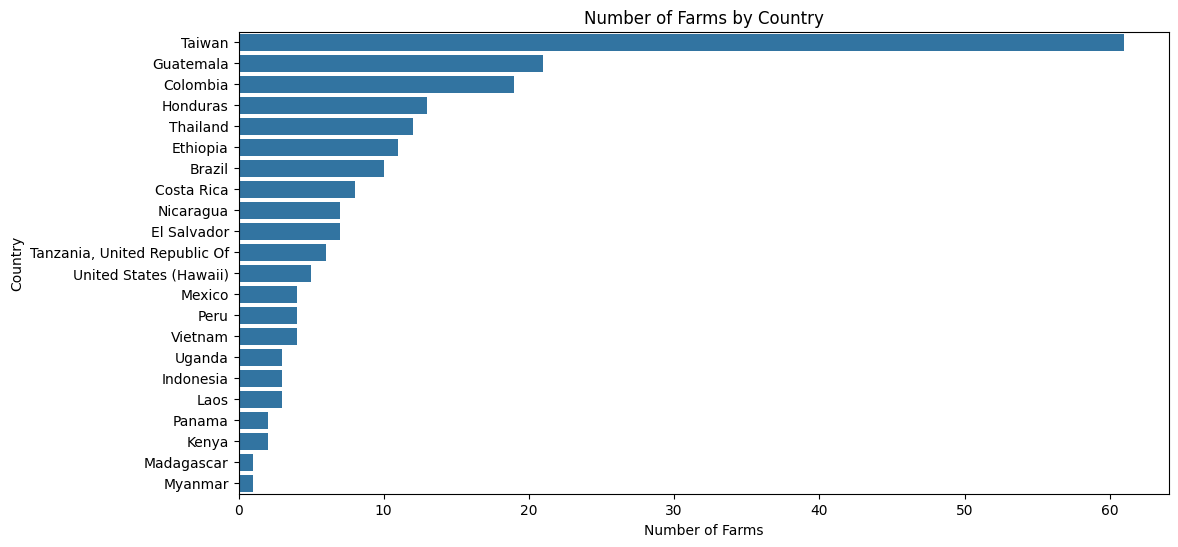

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(data=coffee_data_cleaned, y='Country of Origin', order=coffee_data_cleaned['Country of Origin'].value_counts().index)
plt.xlabel('Number of Farms')
plt.ylabel('Country')
plt.title('Number of Farms by Country')
plt.show()

C:\Users\Meddieek\AppData\Local\Temp\ipykernel_5108\138769972.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_countries, x='Total Cup Points', y='Country of Origin', palette='Blues_d')


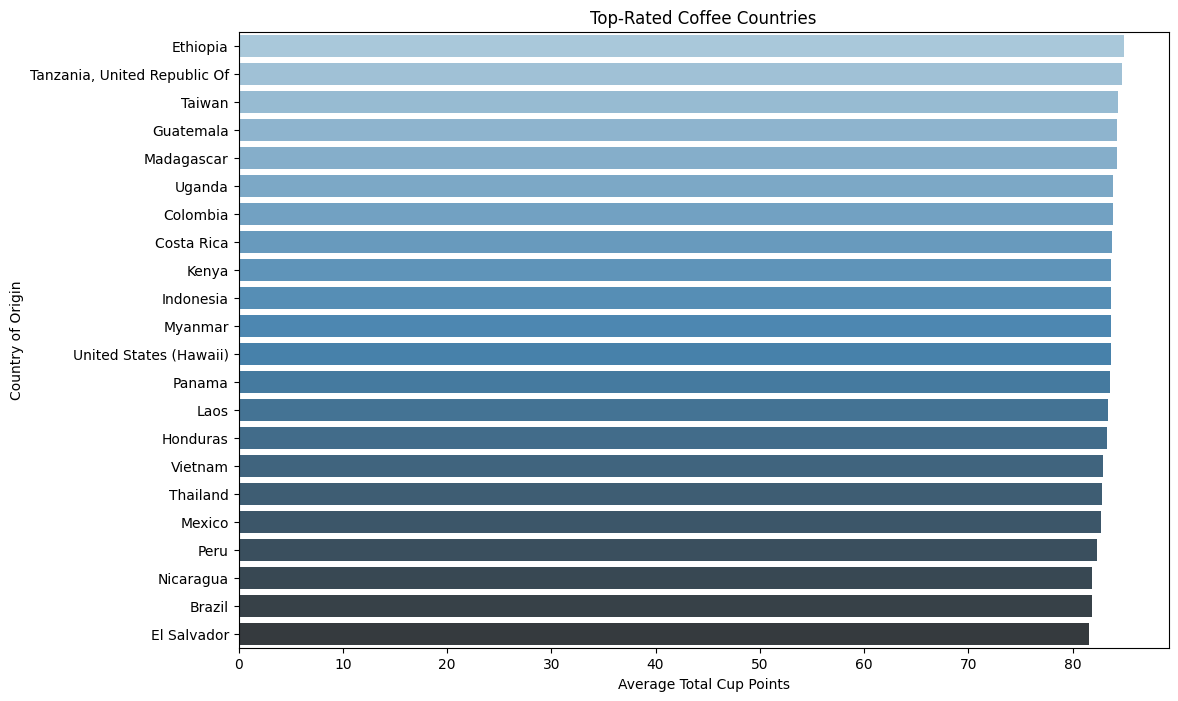

In [42]:
average_points = coffee_data_cleaned.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()
sorted_countries = average_points.sort_values('Total Cup Points', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_countries, x='Total Cup Points', y='Country of Origin', palette='Blues_d')
plt.xlabel('Average Total Cup Points')
plt.ylabel('Country of Origin')
plt.title('Top-Rated Coffee Countries')
plt.show()

In [45]:
average_points = coffee_data_cleaned.groupby(['Country of Origin', 'Farm Name'])['Total Cup Points'].mean().reset_index()
sorted_farms = average_points.sort_values(['Country of Origin', 'Total Cup Points'], ascending=[True, False])
top_farms = sorted_farms.groupby('Country of Origin').first().reset_index()
fig = px.scatter(top_farms, x='Total Cup Points', y='Country of Origin', text='Farm Name',
                 title='Top Farms in Each Country', color='Total Cup Points',
                 labels={'Total Cup Points': 'Average Total Cup Points'})
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title='Average Total Cup Points')
fig.show()

In [46]:
producer_counts = coffee_data_cleaned['Producer'].value_counts().reset_index()
producer_counts.columns = ['Producer', 'Farm Count']
sorted_producers = producer_counts.sort_values('Farm Count', ascending=False)
top_producers = sorted_producers.head(20)
fig = px.bar(top_producers, x='Producer', y='Farm Count',
             title='Top Producers', labels={'Farm Count': 'Number of Farms'})

fig.show()

fig = px.sunburst(top_producers, path=['Producer'], values='Farm Count',
                  title='Top Producers')

fig.show()

In [47]:
columns = ['Flavor', 'Aroma', 'Aftertaste', 'Acidity', 'Body', 'Balance',
           'Uniformity', 'Sweetness', 'Overall']
coffee_data_cleaned['Mean Score'] = coffee_data_cleaned[columns].mean(axis=1)
best_coffee_row = coffee_data_cleaned.loc[coffee_data_cleaned['Mean Score'].idxmax()]
best_coffee_details = best_coffee_row[['Company', 'Variety', 'Country of Origin', 'Farm Name', 'Processing Method']]
print("Best Coffee Combination:")
print("Company:", best_coffee_details['Company'])
print("Variety:", best_coffee_details['Variety'])
print("Country of Origin:", best_coffee_details['Country of Origin'])
print("Farm Name:", best_coffee_details['Farm Name'])
print("Processing Method:", best_coffee_details['Processing Method'])

Best Coffee Combination:
Company: Coffee Quality Union
Variety: Castillo
Country of Origin: Colombia
Farm Name: Finca El Paraiso
Processing Method: Washed / Wet


In [48]:
variety_counts = coffee_data_cleaned['Variety'].value_counts().reset_index()
variety_counts.columns = ['Variety', 'Farm Count']
sorted_varieties = variety_counts.sort_values('Farm Count', ascending=False)
top_varieties = sorted_varieties.head(15)
fig = px.bar(top_varieties, x='Variety', y='Farm Count',
             title='Top Varieties', labels={'Farm Count': 'Number of Farms'})
fig.show()
fig = px.sunburst(top_varieties, path=['Variety'], values='Farm Count',
                  title='Top Varieties')
fig.show()

In [49]:
company_counts = coffee_data['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Farm Count']
sorted_companies = company_counts.sort_values('Farm Count', ascending=False)
top_company = sorted_companies.iloc[0]['Company']
top_company_data = coffee_data[coffee_data['Company'] == top_company]
country_counts = top_company_data['Country of Origin'].value_counts().reset_index()
country_counts.columns = ['Country', 'Farm Count']
fig = px.choropleth(country_counts, locations='Country', locationmode='country names',
                    color='Farm Count', title='Top Company: Farms by Country')
fig.show()

In [50]:
columns_to_drop = ['ID','ICO Number','Owner','Region','Certification Contact','Certification Address','Farm Name',"Lot Number","Mill","ICO Number","Producer",'Company','Expiration', 'Harvest Year',
                   "Unnamed: 0",'Number of Bags','Bag Weight','In-Country Partner','Grading Date','Variety','Status','Defects','Uniformity','Clean Cup','Sweetness','Certification Body']
coffee_data.drop(columns_to_drop, axis=1, inplace=True)

In [55]:
# List of numeric attributes
numeric_attributes = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage']

# Create a subplot for each numeric attribute
fig = make_subplots(rows=len(numeric_attributes), cols=1)

# Add a histogram to the subplot for each numeric attribute
for i, attribute in enumerate(numeric_attributes):
    fig.add_trace(go.Histogram(x=coffee_data[attribute], nbinsx=50, name=attribute), row=i+1, col=1)

fig.update_layout(height=200*len(numeric_attributes), width=800, title_text="Histograms of Numeric Attributes")
fig.show()

In [56]:
coffee_data.columns

Index(['Country of Origin', 'Altitude', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects'],
      dtype='object')

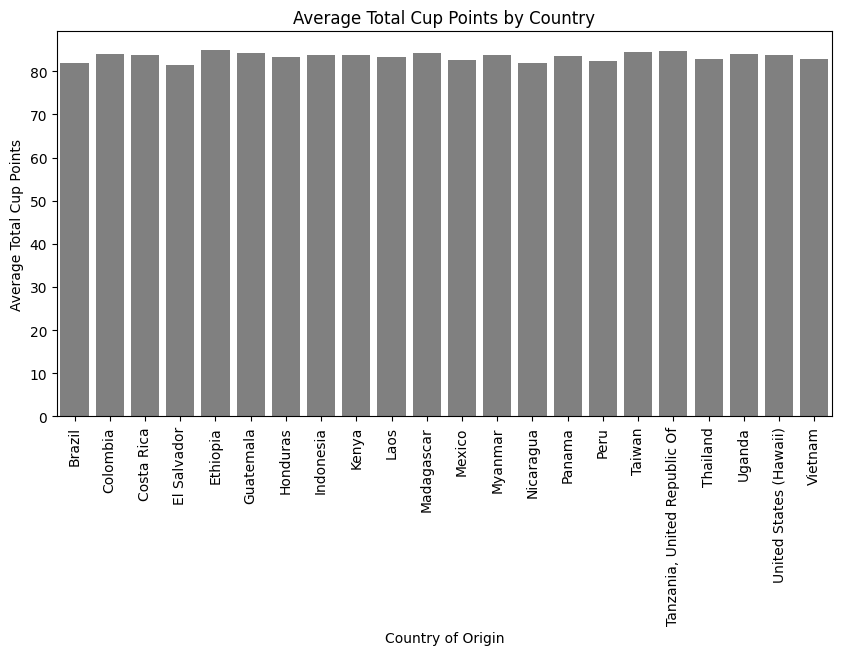

In [57]:
# Group the data by country and calculate the mean of Total Cup Points
df_grouped = coffee_data.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()

# Create a Choropleth map
fig = px.choropleth(df_grouped, 
                    locations='Country of Origin', 
                    locationmode='country names',
                    color='Total Cup Points',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Total Cup Points by Country')

fig.show()

# Create a bar plot with gray color
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['Country of Origin'], y=df_grouped['Total Cup Points'], color='gray')
plt.title('Average Total Cup Points by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Average Total Cup Points')
plt.xticks(rotation=90)
plt.show()

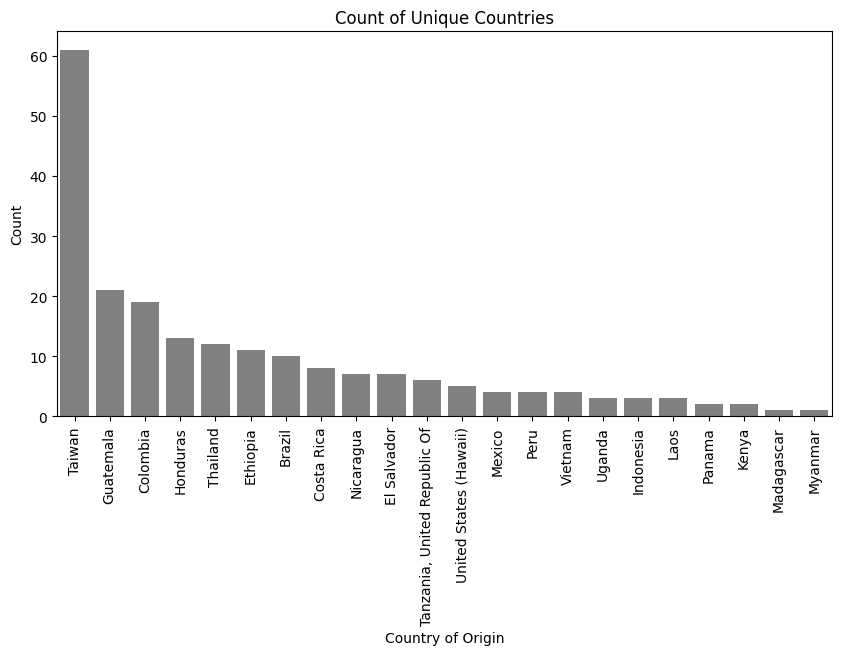

In [59]:
# Count the unique occurrences of each country
df_count = coffee_data['Country of Origin'].value_counts().reset_index()
df_count.columns = ['Country of Origin', 'Count']

# Create a choropleth map
fig = px.choropleth(df_count, 
                    locations='Country of Origin', 
                    locationmode='country names',
                    color='Count',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Count of Unique Countries')

fig.show()

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=df_count['Country of Origin'], y=df_count['Count'], color='gray')
plt.title('Count of Unique Countries')
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()